load the csv

In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('Phising_Training_Dataset.csv')

print(dataset.shape)
dataset.drop('key', axis=1, inplace=True)
dataset.head()

(8955, 32)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [10]:
from sklearn.decomposition import PCA

df = dataset#.iloc[201:211]
pca = PCA(n_components=2, whiten=True).fit(df)
X_pca = pca.transform(df)

# print(pca.components_)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)
# print(df.keys())

[0.14397271 0.13858263]
0.2825553473046757
[153.50213182 150.60130024]


[[-0.17795452  0.09311273 -0.19329072 -0.17999322 -0.19329296  0.07522864
   0.06668033  0.13551631 -0.1461557  -0.36529122 -0.29296361 -0.2088107
   0.11855558  0.06616997  0.11669767  0.05734221 -0.32207755 -0.22400871
   0.04934995 -0.25392019 -0.10412213 -0.37044827 -0.20380979  0.0858164
  -0.16539308  0.09537012  0.00339943 -0.02799028  0.07769538 -0.13620795
   0.15769053]
 [-0.101649   -0.08893427 -0.01210405 -0.08181753 -0.02010914 -0.14323276
  -0.17820877 -0.41306688  0.27687203 -0.13695881 -0.13307518 -0.02932626
  -0.32171211 -0.30375655 -0.09840215 -0.12505159 -0.13410051 -0.02630615
   0.01288732 -0.11106369 -0.04207041 -0.13799201 -0.08158743 -0.15483896
  -0.11034347 -0.20932863 -0.07932045 -0.06034372  0.04265378 -0.07869617
  -0.50988554]]


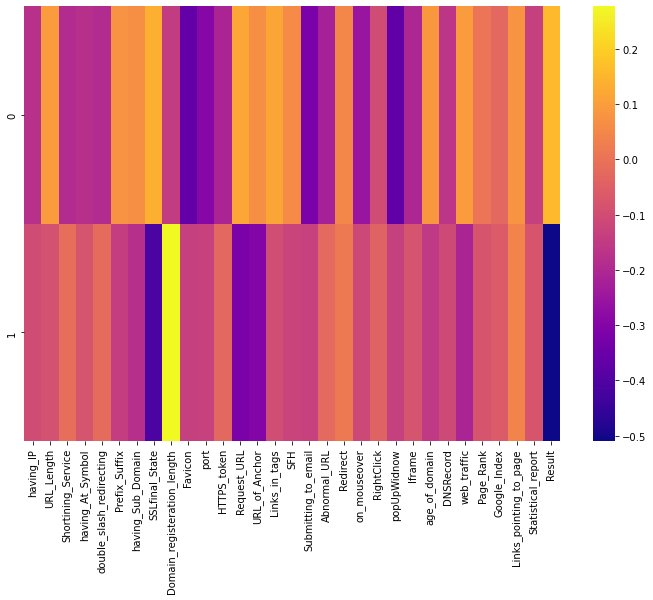

In [12]:
import seaborn as sns

df_comp = pd.DataFrame(pca.components_, columns=df.keys())
plt.figure(figsize=(12,8))
sns.heatmap(df_comp, cmap="plasma")
print(pca.components_)

In [13]:
#XG boost

from sklearn.model_selection import train_test_split
import xgboost as xgb

x, y = dataset.iloc[:, :-1], dataset.iloc[:, [-1]]
y.replace(-1,0,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)


param = {
    'max_depth': 20,
    'eta': 0.4,
    'objective': 'multi:softmax',
    'num_class': 2} 
epochs = 30 

model = xgb.train(param, train, epochs)
predictions = model.predict(test)

print(predictions)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

c:\Users\kalra_m\Anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


[15:39:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1. 1. 1. ... 1. 1. 0.]
[[767  30]
 [ 23 971]]


In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9704075935231714